<a id='top'></a>

# CSCI3022 F21
# Homework 8: Confidence, Testing, Small Samples
***

**Name**: Caleb Starkey

***

This assignment is due on Canvas (as .ipynb) and Gradescope (as a .pdf) by **MIDNIGHT on Wed 17 Nov**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) |
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as stats
import itertools
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
## Problem 1 (Small Samples; 20 points)

Consider the `hubble.csv` data set we used in nb15. In that example, we used the large-sample normal approximation and used it to calculate a confidence interval for the mean of a galaxy's distance from Earth in Mega parsecs (column `x` of the data).

Unfortunately, the data was only 24 observations!  What could we have done instead?


In [2]:
# Path to the data - select the path that works for you 
file_path = './data/hubble.csv'

# Load the data into a DataFrame 
df = pd.read_csv(file_path)
df.head(5)

,Galaxy,y,x
0,NGC0300,133,2.00
1,NGC0925,664,9.16
2,NGC1326A,1794,16.14
3,NGC1365,1594,17.95
4,NGC1425,1473,21.88



**Part A**:

Make a histogram of the data and overlay the theoretical density of the normal with mean $\bar{X}$ and variance $s^2$.  How closely do the data follow the histogram?


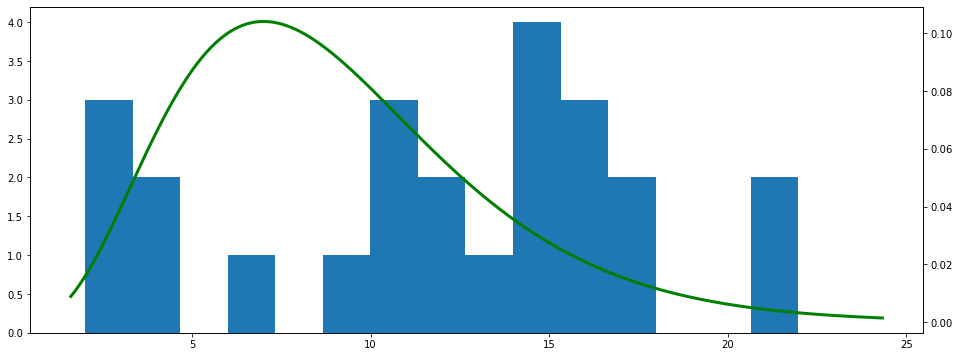

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
ax1 = ax.twinx()
ax.hist(df["x"],bins = 15)
mean = df["x"].mean()
var = df["x"].var()
data = np.array([(10-1)*np.var(stats.norm.rvs(mean, np.sqrt(var), size=10),ddof=1)/var for i in range(1000)])

xplot = np.linspace(np.min(data), np.max(data), 200)
pdf = stats.chi2.pdf(xplot,10-1)
ax1.plot(xplot, pdf, color="green", lw=3)


They don't look similar at all 

**Part B**:

Things may not look perfectly normal in part A... but let's perform the tests that require normality anyways:

For Part B only, assume each observation is independent and identically distributed as a normal random variable.

- Create a 95% confidence interval for the mean of a galaxy's distance from Earth in Mega parsecs.
- Create a 95% confidence interval for the standard deviation of a galaxy's distance from Earth in Mega parsecs.

In [4]:
meanCi = stats.norm.interval(.95, loc=mean, scale=np.sqrt(var)/len(df))
print("95% confidence interval for the mean of a galaxy's distance from Earth in Mega parsecs:",meanCi)
stdCi = [np.sqrt((len(df)-1)*np.var(df["x"], ddof=1)/i) for i in [stats.chi2.ppf(1-.05/2, len(df)-1), stats.chi2.ppf(.05/2, len(df)-1)]]
print("95% confidence interval for the standard deviation of a galaxy's distance from Earth in Mega parsecs:",stdCi)

95% confidence interval for the mean of a galaxy's distance from Earth in Mega parsecs: (11.579729085783674, 12.52943758088299)
95% confidence interval for the standard deviation of a galaxy's distance from Earth in Mega parsecs: [4.519223941819863, 8.156560101133485]


**Part C**:

For part C only, assume each observation is independent and identically distributed but is **not** normally distributed.  Instead, use bootstrapping to:

- Create a 95% confidence interval for the mean of a galaxy's distance from Earth in Mega parsecs.
- Create a 95% confidence interval for the standard deviation of a galaxy's distance from Earth in Mega parsecs.
- Create a 95% confidence interval for the interquartile range (both lower and upper quartiles) of a galaxy's distance from Earth in Mega parsecs.

Use 10,000 bootstrapped samples to make the statistics above.

In [5]:
b = np.array([np.mean(np.random.choice(df["x"], replace=True, size=len(df))) for i in range(10000)])
L, U = np.percentile(b, 2.5), np.percentile(b, 97.5)
CI = (L, U)


bstd = np.array([np.std(np.random.choice(df["x"], replace=True, size=len(df))) for i in range(10000)])
Lstd, Ustd = np.percentile(bstd, 2.5), np.percentile(bstd, 97.5)
CIstd = (Lstd, Ustd)

biqr = np.array([stats.iqr(np.random.choice(df["x"], replace=True, size=len(df))) for i in range(10000)])
Liqr, Uiqr = np.percentile(biqr, 2.5), np.percentile(biqr, 97.5)
CIiqr = (Liqr, Uiqr)

In [6]:
print("95% confidence interval for the mean of a galaxy's distance from Earth in Mega parsecs:",CI)
print("95% confidence interval for the standard deviation of a galaxy's distance from Earth in Mega parsecs:",CIstd)
print("95% confidence interval for the interquartile range (both lower and upper quartiles) of a galaxy's distance from Earth in Mega parsecs",CIiqr)

95% confidence interval for the mean of a galaxy's distance from Earth in Mega parsecs: (9.73328125, 14.301249999999998)
95% confidence interval for the standard deviation of a galaxy's distance from Earth in Mega parsecs: (4.172645476104012, 6.7405875732960014)
95% confidence interval for the interquartile range (both lower and upper quartiles) of a galaxy's distance from Earth in Mega parsecs (4.064375000000002, 12.559999999999999)


<br>

---
<a/ id='p2'></a>
[Back to top](#top)

## Problem 2 (Hypotheses and Simulation; 25 points)
***

In hypothesis testing, we typically ask "what is the probability of observing *this* test statistic if everything is fair/random."  Often, we reach this probability via test statistics on known distributions (`Z`, `T`, proportions, sample variances, etc.).  We then draw conclusions like "that doesn't look random!  It's extremely unlikely to happen under the **null hypothesis**, so we reject that hypothesis."

However, if we can **simulate**, we can leverage our (arbitrarily) large sample size to generate the same probabilities used for hypothesis tests *without* converting into an intermediate distribution.  In other words, you should make **no distributional assumptions** in this problem.

Suppose we're about to play a newly invented "game" of chance.

In this game, you:

    1) Roll a single (fair) 6-sided die.  The value of the upward face of the die is your score.
    
    2) Roll a number of 6-sided dice equal to your score in 1).  Add the value of the upward faces of the die to your score.
    
    3) Continue to roll a number additional dice equal to exactly what was face-up on your previous roll, adding the result to your score.
    
    4) If at any time, you've rolled 20 or more dice with the *same* value showing, do not roll again.  Simply add the current result to your score and stop.

Not being in the mood to solve an incredibly tedious discrete probability problem, you decide to *simulate* the game to get a feeling for what a reasonable score is.

One simulation might be:

    1) Zach rolls a '5'.  Score is 5.
    2) Zach rolls '1, 2, 2, 5, 6'.  Add 16, so score is now 21.
    3) Zach rolls 16 dice.  He adds the resulting faces (in this case, 51) to his score, which is now 72.
    4) Zach rolls 51 dice and adds the resulting 163 to his score, making a score of 235.
    5) He rolls once more - 163 dice - adding 500 for a score of 735.  This is his final score, as this last roll included 35 "4's" as the most common die face (and 35 is 20 or more).

**Part A**: Simulate 10,000 "plays" of this game, saving all of the final scores as well as the first roll of each.  Report the average final score.

NB: `np.unique` can be a good way to check if you have 20 or more of one face.

In [11]:
def roll(n,die= [1,2,3,4,5,6]):
    return(np.random.choice(die,size=n))

def fkitrecursion(acc):
    rolls = roll(acc)
    counts = np.unique(rolls,return_counts=True)[1].tolist()
    if any(i > 20 for i in counts):
        return(sum(rolls))
    else:
        return(acc + fkitrecursion(sum(rolls)))

data = [fkitrecursion(roll(1)) for i in range(10000)]
data = np.concatenate(data)
print(np.mean(data))
print(data)

741.5181
[450 994 651 ... 779 783 728]


**Part B**: Create a density histogram of the final scores.  Label axes, and include a title.  Does this appear to be normally distributed? Why would we care?
    

Text(0.5, 1.0, 'Density histogram of scores')

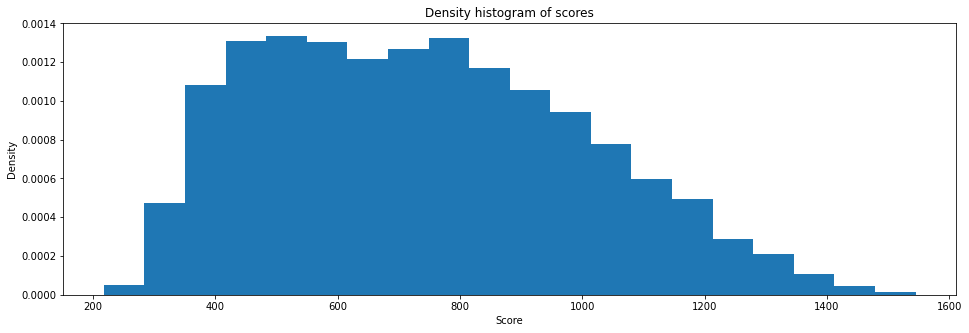

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
ax.hist(data,bins = 20,density=True)
ax.set_xlabel("Score")
ax.set_ylabel("Density")
ax.set_title("Density histogram of scores")

This does not appear to have a normal distribution. 

**Part C**: Your friend (who really hates losing) approaches you and says "I'm pretty sure this game is unfair and your dice are loaded.  I played 10 times and my average score was a 500!  There's no way that should happen on fair dice."

**C1**: What is your estimated probability that a single game scores 500 or less?
    
**C2**: What would you estimate the probability to be that an average score of 10 games is 500 or less?
     
**C3**: Suppose we were to create a 1-tailed hypothesis test of the form "I reject the null hypothesis that fair dice were used if a set of 10 games has an average score less than or equal to $c$."  What would you choose for $c$ if you wanted a probability of Type I error of .01 or less?

**C4**: What do you tell your friend?

In [ ]:
print(len([i for i in data if i < 500])/10000)

draws = [(np.random.choice(data, size=10).sum()/10) for i in range(1000)]
print(len([i for i in draws if i <= 500])/1000)

mean = np.mean(data)
std = pd.DataFrame(data).std()
c = mean - 2.3262*(std/np.sqrt(10))
print(c)

C1:The estimated probability that a game scores 500 or less is .2066$\newline$
C2:The estimated probability that an average score of 10 games is 500 or less is .001$\newline$
C3:C=552.557 if you wanted a probability of Type 1 error of .01 or less$\newline$
C4:Man most likely had sus die.

**Part D**: You decide that if you wanted to cheat your friend, it would make way more sense to weight the *first* die roll than try to find tens or hundreds of weighted dice.  Carefully justifying your answer with both numerical and visual results, how would you weight the die on the *first* roll to **minimize** your friends score?

In [22]:
draws1 = [(np.random.choice(data1, size=10).sum()/10) for i in range(1000)]
print(len([i for i in draws1 if i <= 500])/1000)
draws2 = [(np.random.choice(data2, size=10).sum()/10) for i in range(1000)]
print(len([i for i in draws2 if i <= 500])/1000)
draws3 = [(np.random.choice(data3, size=10).sum()/10) for i in range(1000)]
print(len([i for i in draws3 if i <= 500])/1000)
draws4 = [(np.random.choice(data4, size=10).sum()/10) for i in range(1000)]
print(len([i for i in draws4 if i <= 500])/1000)
draws5 = [(np.random.choice(data5, size=10).sum()/10) for i in range(1000)]
print(len([i for i in draws5 if i <= 500])/1000)
draws6 = [(np.random.choice(data6, size=10).sum()/10) for i in range(1000)]
print(len([i for i in draws6 if i <= 500])/1000)

0.003
0.006
0.01
0.0
0.0
0.0


It appears that weighting the die towards lower first draws(1-3) minimizes their score